LAB-1 Develop a program to create histograms for all numerical features and analyze the distribution of each 
feature. Generate box plots for all numerical features and identify any outliers. Use California Housing 
dataset.

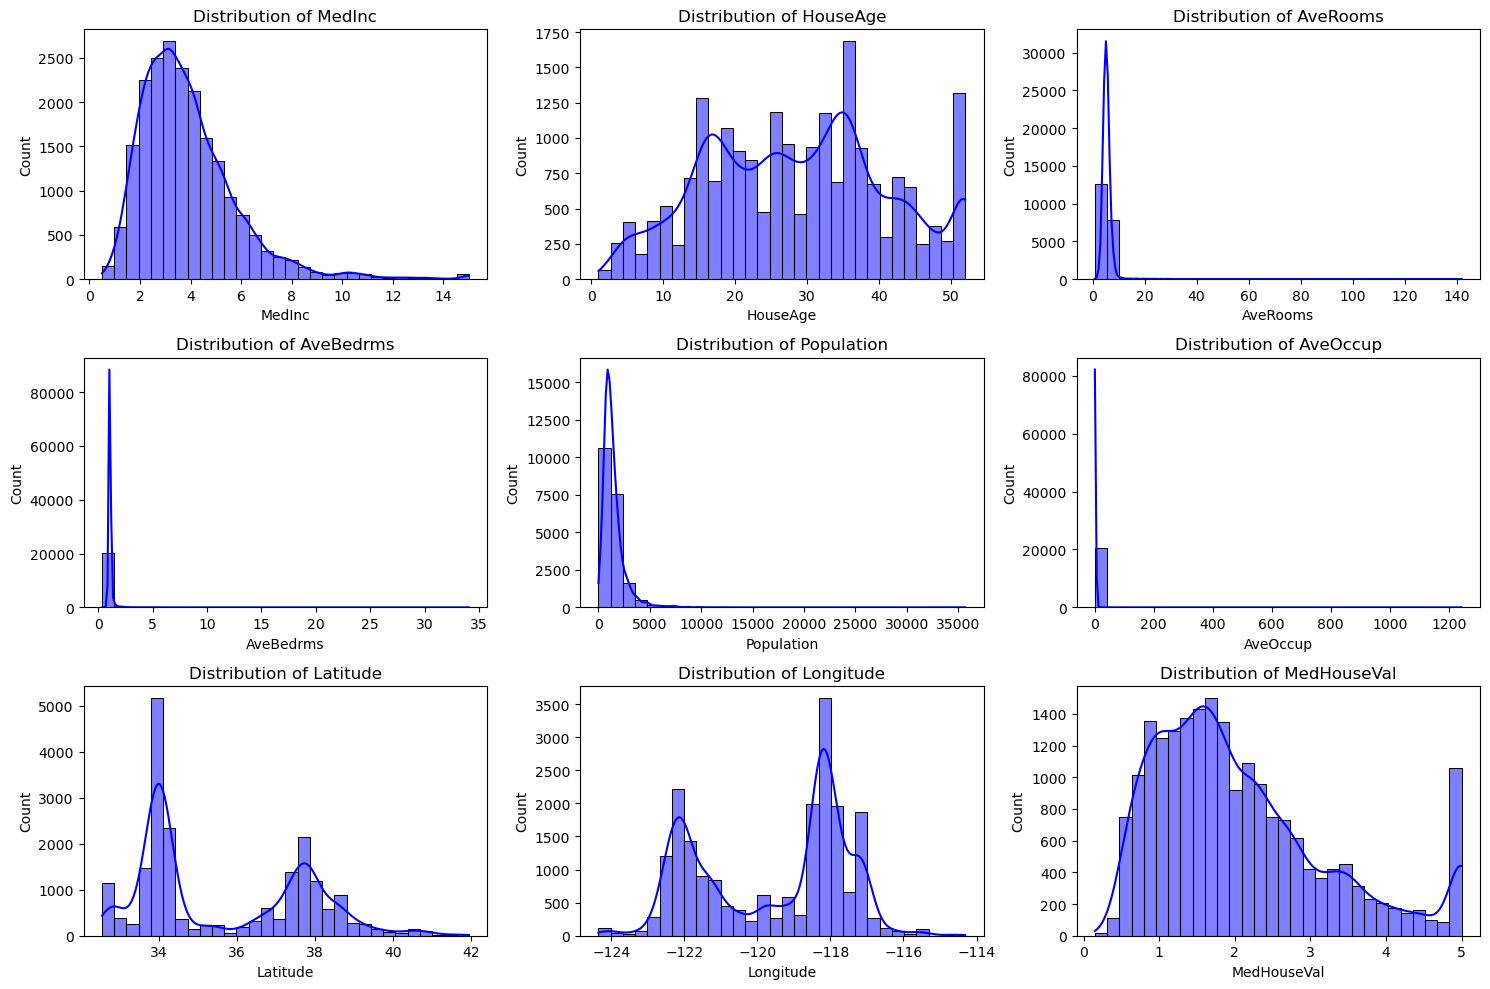

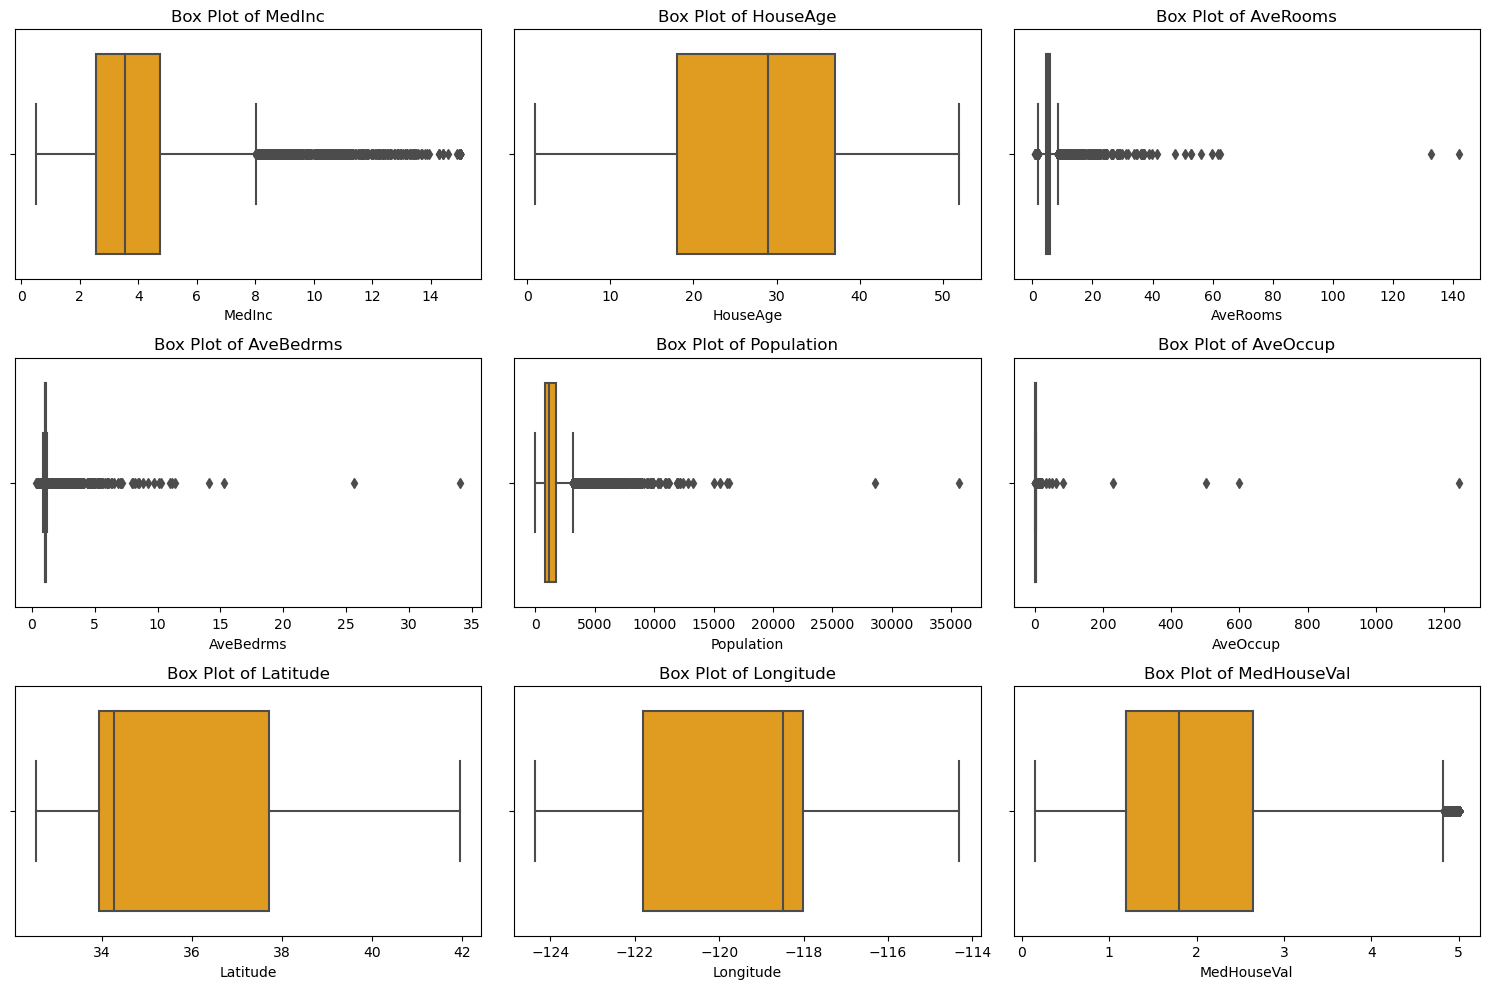

Outliers Detection:
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers

Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Lon

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing_df = data.frame

# Step 2: Create histograms for numerical features
numerical_features = housing_df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(housing_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Step 3: Generate box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=housing_df[feature], color='orange')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# Step 4: Identify outliers using the IQR method
print("Outliers Detection:")
outliers_summary = {}

for feature in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = housing_df[
        (housing_df[feature] < lower_bound) |
        (housing_df[feature] > upper_bound)
    ]

    outliers_summary[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers")

# Optional: Print a summary of the dataset
print("\nDataset Summary:")
print(housing_df.describe())

LAB-2 Develop a program to Compute the correlation matrix to understand the relationships between pairs of features. 
Visualize the correlation matrix using a heatmap to know which variables have strong positive/negative 
correlations. Create a pair plot to visualize pairwise relationships between features. Use California Housing 
dataset.

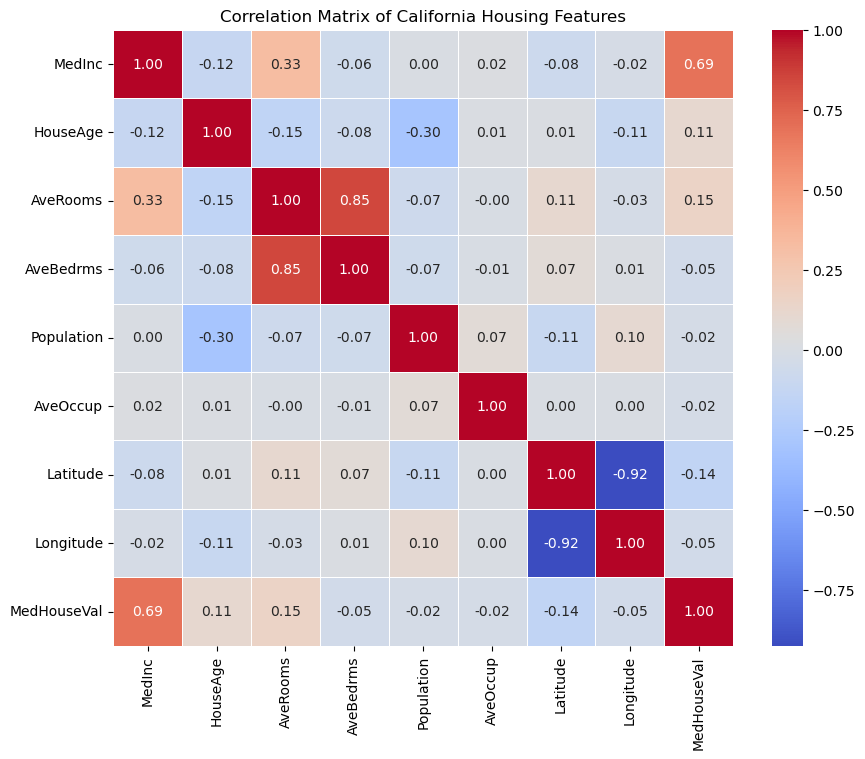

C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


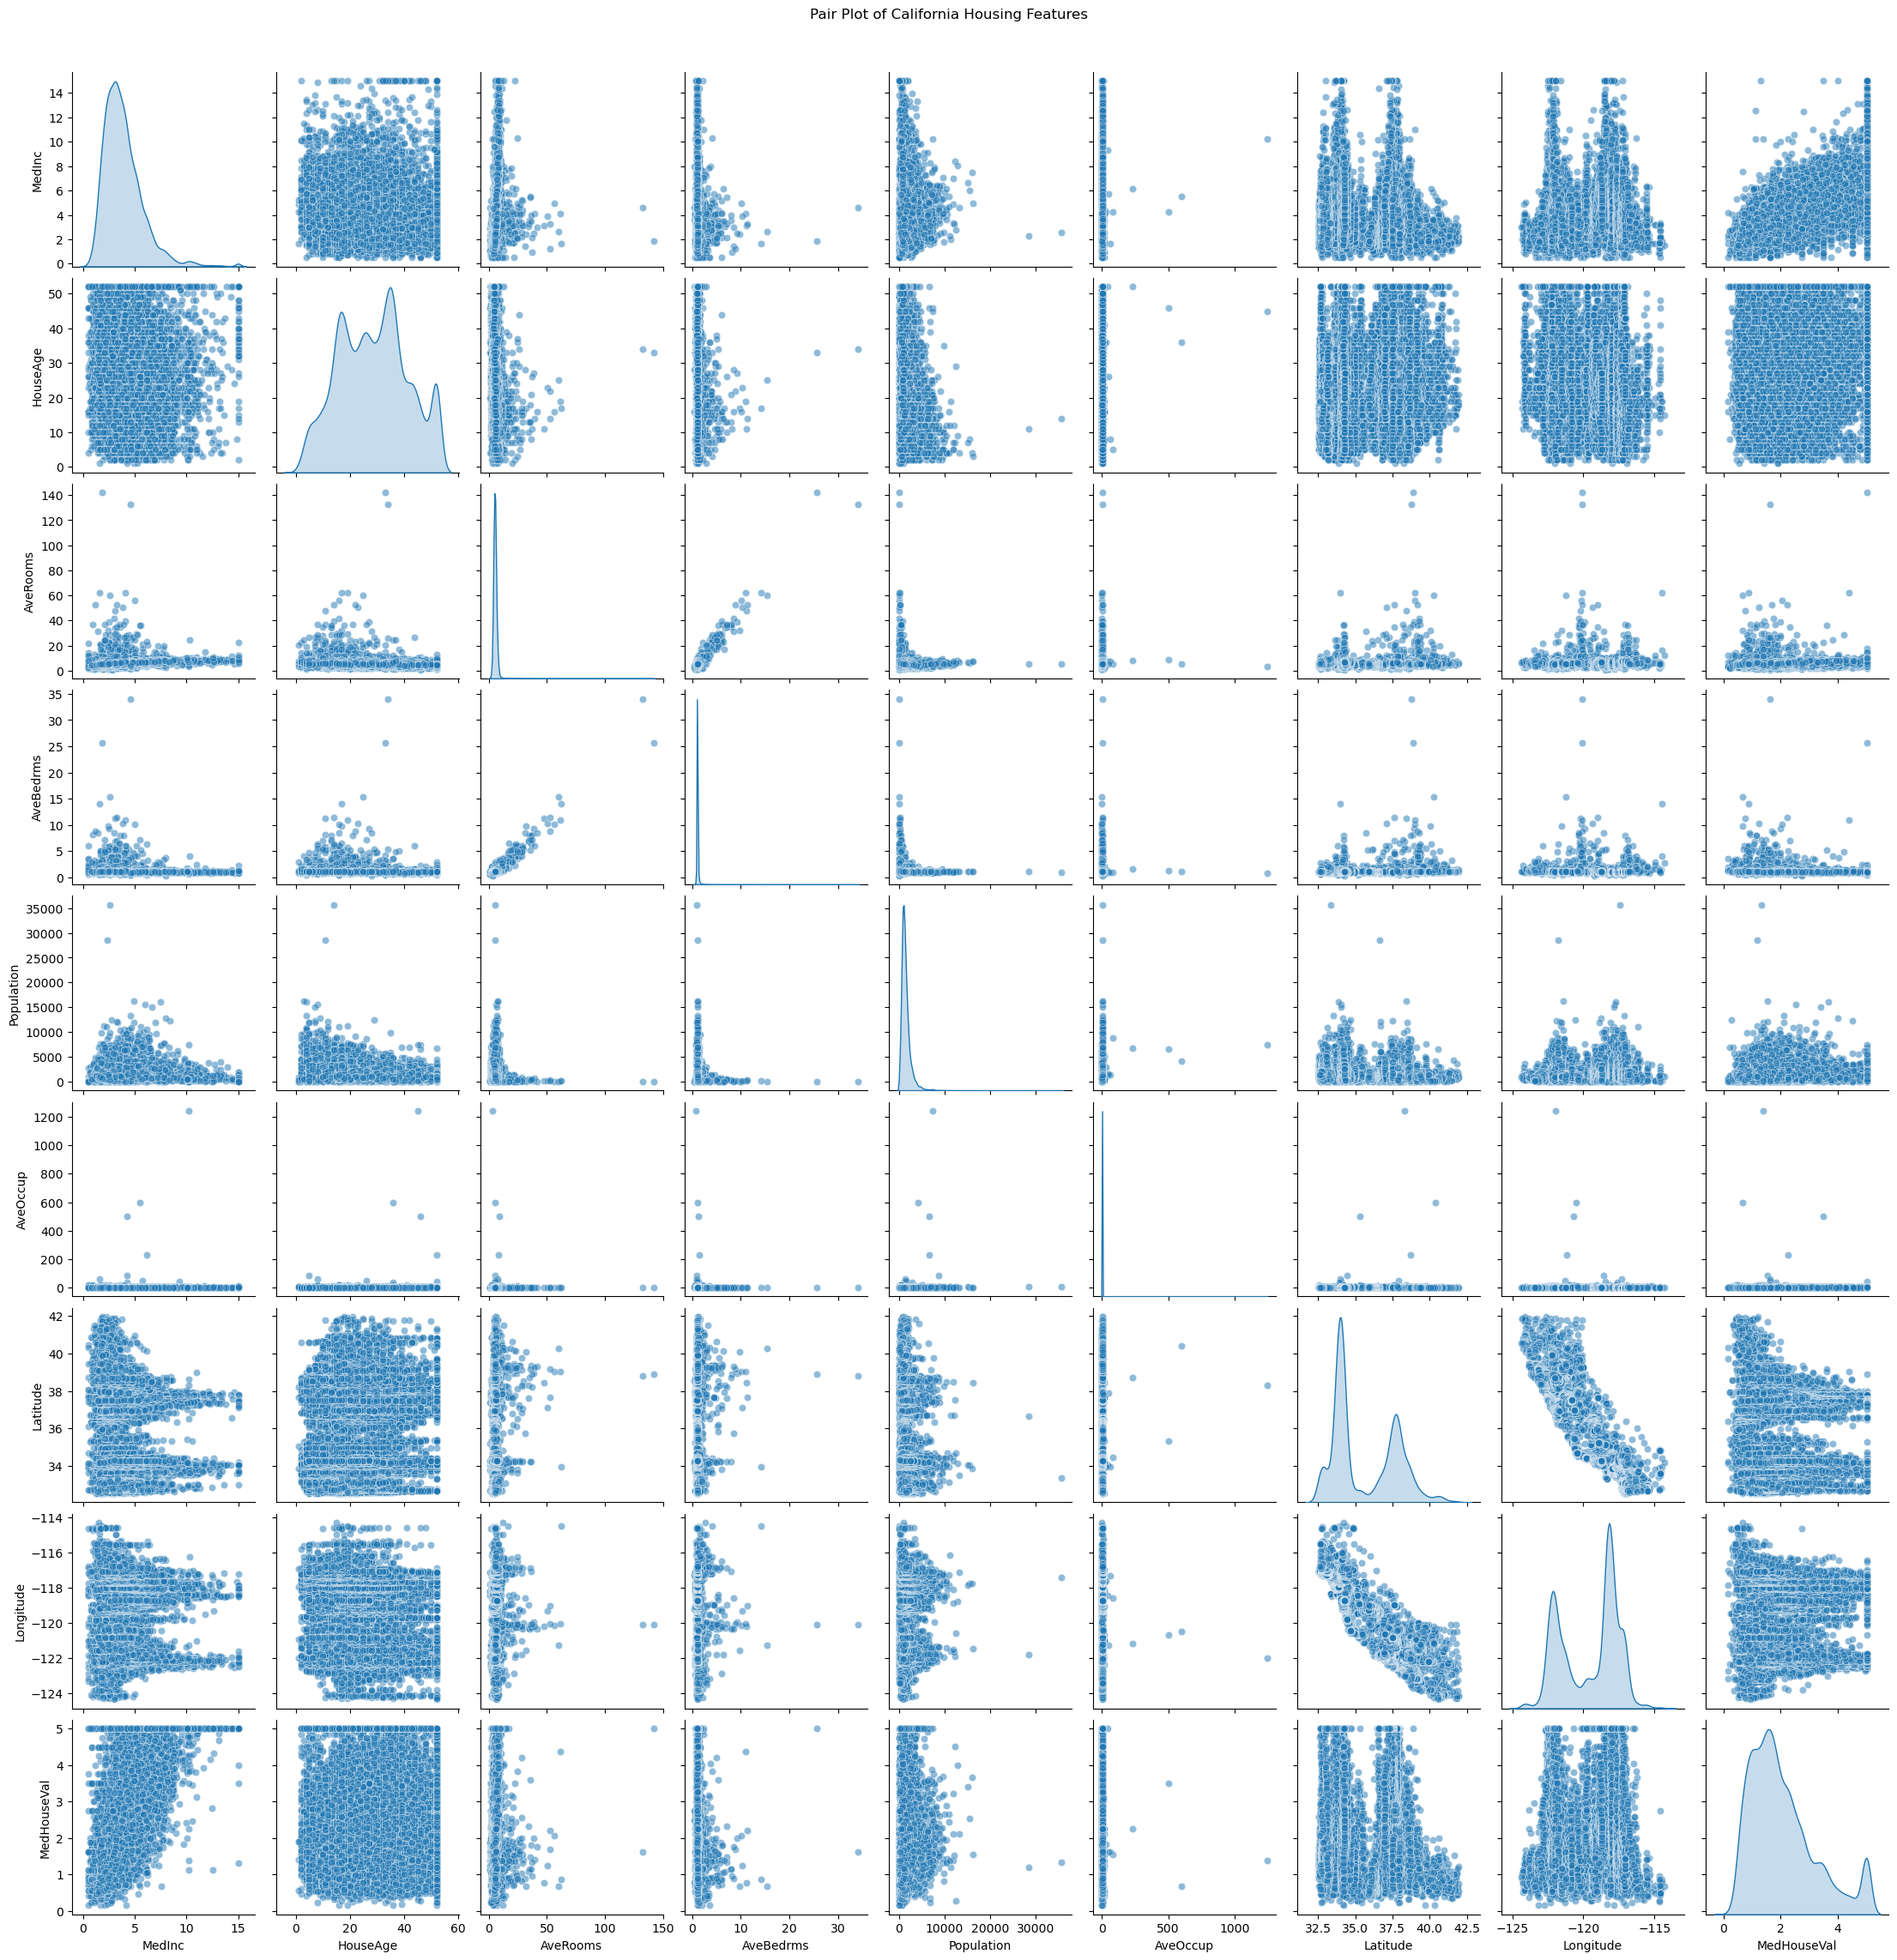

In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California Housing Dataset 
california_data = fetch_california_housing(as_frame=True) 
data = california_data.frame

# Step 2: Compute the correlation matrix 
correlation_matrix = data.corr()

# Step 3: Visualize the correlation matrix using a heatmap 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
linewidths=0.5) 
plt.title('Correlation Matrix of California Housing Features') 
plt.show()

# Step 4: Create a pair plot to visualize pairwise relationships 
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5}) 
plt.suptitle('Pair Plot of California Housing Features', y=1.02) 
plt.show()

LAB-3 Develop a program to implement Principal Component Analysis (PCA) for reducing the dimensionality 
of the Iris dataset from 4 features to 2.

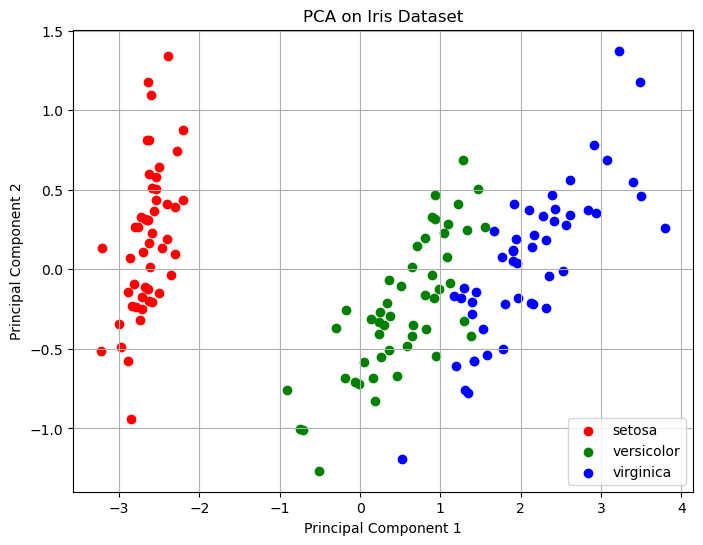

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

# Load the Iris dataset 
iris = load_iris() 
data = iris.data 
labels = iris.target 
label_names = iris.target_names

# Convert to a DataFrame for better visualization 
iris_df = pd.DataFrame(data, columns=iris.feature_names)

# Perform PCA to reduce dimensionality to 2 
pca = PCA(n_components=2) 
data_reduced = pca.fit_transform(data)

# Create a DataFrame for the reduced data 
reduced_df = pd.DataFrame(data_reduced, columns=['Principal Component 1', 
'Principal Component 2']) 
reduced_df['Label'] = labels

# Plot the reduced data 
plt.figure(figsize=(8, 6)) 
colors = ['r', 'g', 'b'] 
for i, label in enumerate(np.unique(labels)): 
    plt.scatter( 
        reduced_df[reduced_df['Label'] == label]['Principal Component 1'], 
        reduced_df[reduced_df['Label'] == label]['Principal Component 2'], 
        label=label_names[label], 
        color=colors[i] 
    ) 
plt.title('PCA on Iris Dataset') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.legend() 
plt.grid() 
plt.show()

LAB-4 For a given set of training data examples stored in a .CSV file, implement and demonstrate the Find-S algorithm 
to output a description of the set of all hypotheses consistent with the training examples. 

In [40]:
import pandas as pd

def find_s_algorithm(file_path):
    data = pd.read_csv(file_path)

    print("Training data:")
    print(data)

    attributes = data.columns[:-1]      # All columns except last
    class_label = data.columns[-1]      # Last column is target

    # Initialize hypothesis with most specific values
    hypothesis = ['?' for _ in attributes]

    for index, row in data.iterrows():
        if row[class_label] == 'Yes':   # Consider only positive examples
            for i, value in enumerate(row[attributes]):
                if hypothesis[i] == '?' or hypothesis[i] == value:
                    hypothesis[i] = value
                else:
                    hypothesis[i] = '?'
    return hypothesis

file_path = "C:\\H-ASSASSIN\\Codeing\\College Works\\Machine Learning Lab BCSL606\\LAB-4\\training_data.csv"
hypothesis = find_s_algorithm(file_path)
print("\nThe final hypothesis is:", hypothesis)

Training data:
    Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Cold     High  False        Yes
4      Rain        Cold     High   True         No
5  Overcast         Hot     High   True        Yes
6     Sunny         Hot     High  False         No

The final hypothesis is: ['Overcast', 'Hot', 'High', '?']


LAB-5 Develop a program to implement k-Nearest Neighbour algorithm to classify the randomly generated 
100 values of x in the range of [0,1]. Perform the following based on dataset generated. a. Label the 
first 50 points {x1,……,x50} as follows: if (xi ≤ 0.5), then xi ∊ Class1, else xi ∊ Class1 b. Classify 
the remaining points, x51,……,x100 using KNN. Perform this for k=1,2,3,4,5,20,30 

--- k-Nearest Neighbors Classification ---
Training dataset: First 50 points labeled based on rule (x <= 0.5 → Class1, x > 0.5 → Class2)
Testing dataset: Remaining 50 points


Results for k = 1:
Point x51 (value: 0.1185) → Class1
Point x52 (value: 0.7843) → Class2
Point x53 (value: 0.8996) → Class2
Point x54 (value: 0.4965) → Class2
Point x55 (value: 0.5718) → Class2
Point x56 (value: 0.3206) → Class1
Point x57 (value: 0.5000) → Class2
Point x58 (value: 0.7180) → Class2
Point x59 (value: 0.4523) → Class1
Point x60 (value: 0.2745) → Class1
Point x61 (value: 0.4148) → Class1
Point x62 (value: 0.9873) → Class2
Point x63 (value: 0.7938) → Class2
Point x64 (value: 0.7937) → Class2
Point x65 (value: 0.9277) → Class2
Point x66 (value: 0.8078) → Class2
Point x67 (value: 0.8184) → Class2
Point x68 (value: 0.0748) → Class1
Point x69 (value: 0.3601) → Class1
Point x70 (value: 0.9886) → Class2
Point x71 (value: 0.9714) → Class2
Point x72 (value: 0.4369) → Class1
Point x73 (value: 0.5440) → Class2


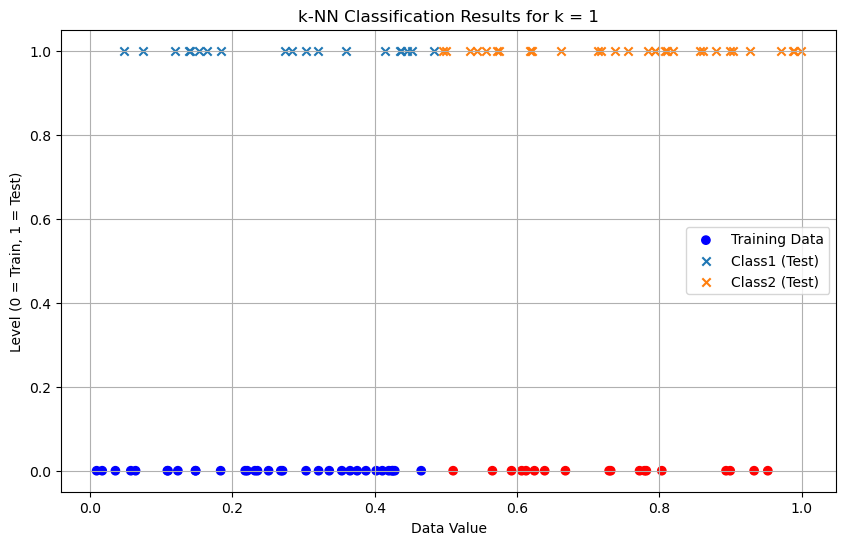

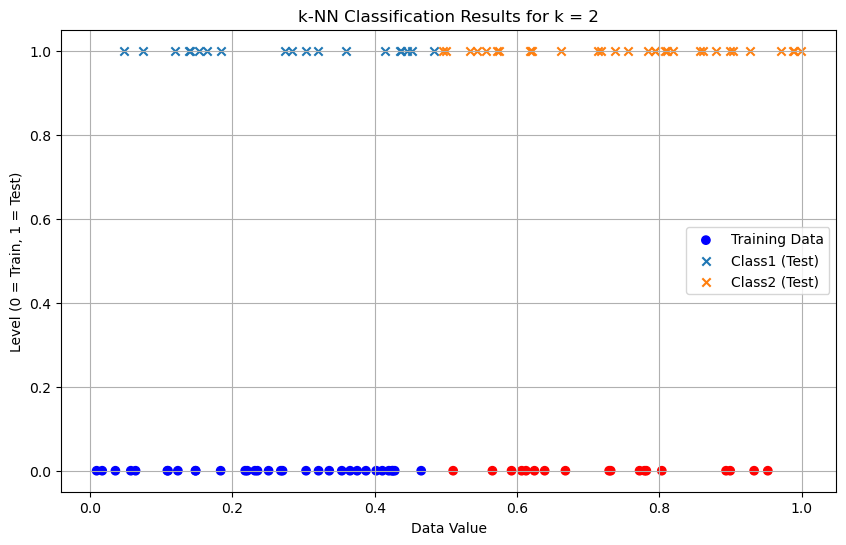

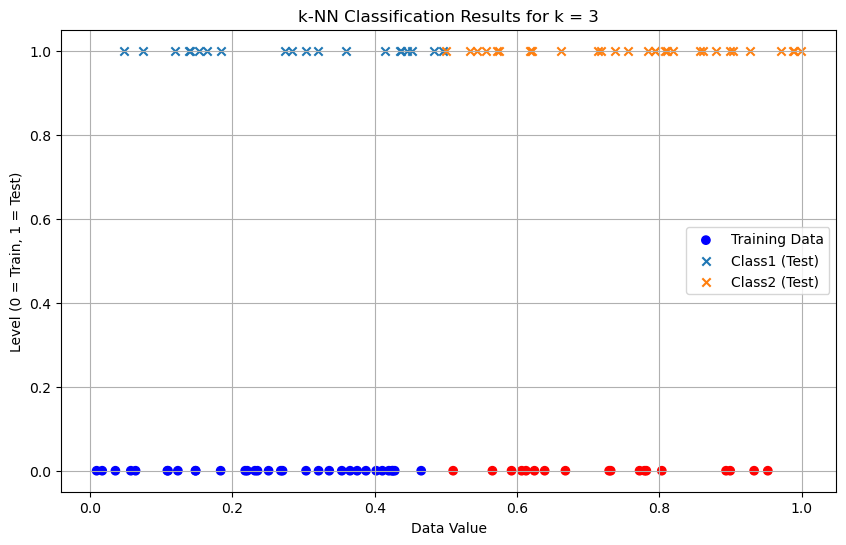

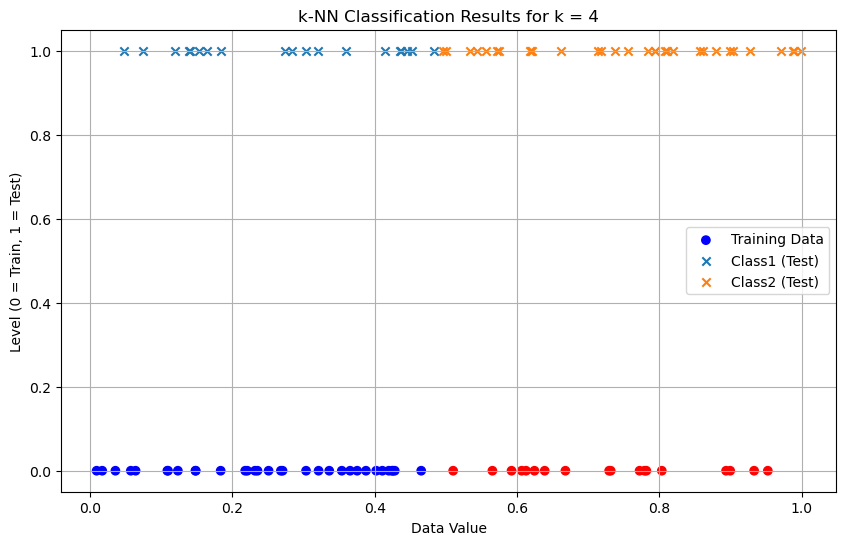

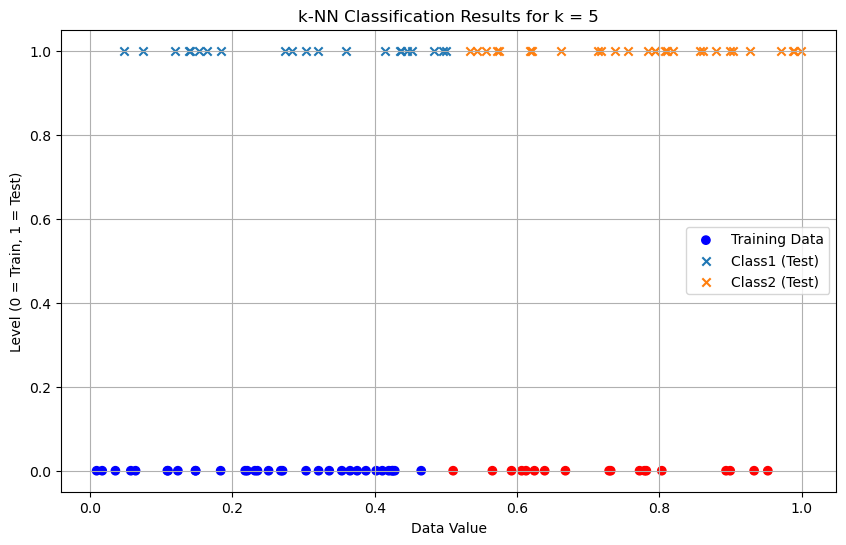

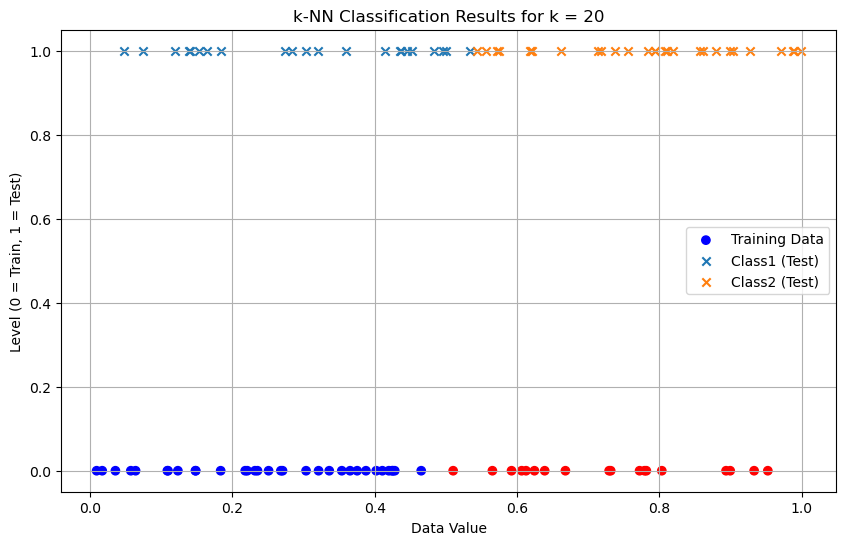

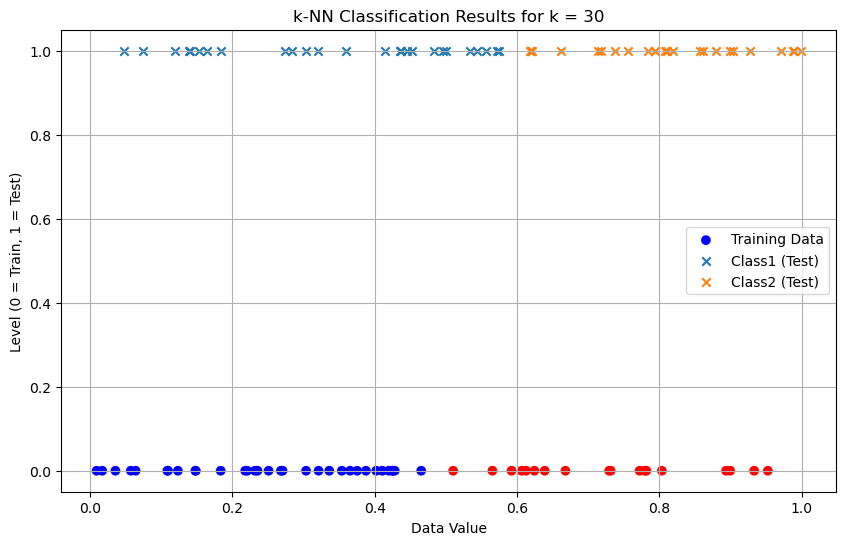

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Generate random data
data = np.random.rand(100)

# Label first 50 points
labels = ["Class1" if x <= 0.5 else "Class2" for x in data[:50]]

# Euclidean distance (1D case)
def euclidean_distance(x1, x2):
    return abs(x1 - x2)

# k-NN classifier
def knn_classifier(train_data, train_labels, test_point, k):
    distances = [
        (euclidean_distance(test_point, train_data[i]), train_labels[i])
        for i in range(len(train_data))
    ]
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]
    k_nearest_labels = [label for _, label in k_nearest_neighbors]
    return Counter(k_nearest_labels).most_common(1)[0][0]

# Split dataset
train_data = data[:50]
train_labels = labels
test_data = data[50:]
k_values = [1, 2, 3, 4, 5, 20, 30]
print("--- k-Nearest Neighbors Classification ---")
print("Training dataset: First 50 points labeled based on rule (x <= 0.5 → Class1, x > 0.5 → Class2)")
print("Testing dataset: Remaining 50 points\n")
results = {}

# Classification
for k in k_values:
    print(f"\nResults for k = {k}:")
    classified_labels = [
        knn_classifier(train_data, train_labels, test_point, k)
        for test_point in test_data
    ]
    results[k] = classified_labels
    for i, label in enumerate(classified_labels):
        print(f"Point x{i+51} (value: {test_data[i]:.4f}) → {label}")
print("\nClassification complete.\n")

# Visualization
for k in k_values:
    classified_labels = results[k]
    class1_points = [
        test_data[i] for i in range(len(test_data))
        if classified_labels[i] == "Class1"
    ]
    class2_points = [
        test_data[i] for i in range(len(test_data))
        if classified_labels[i] == "Class2"
    ]
    plt.figure(figsize=(10, 6))

    # Training data
    plt.scatter(
        train_data,
        [0] * len(train_data),
        c=["blue" if label == "Class1" else "red" for label in train_labels],
        label="Training Data",
        marker="o"
    )

    # Test data
    plt.scatter(class1_points, [1] * len(class1_points),
                label="Class1 (Test)", marker="x")
    plt.scatter(class2_points, [1] * len(class2_points),
                label="Class2 (Test)", marker="x")
    plt.title(f"k-NN Classification Results for k = {k}")
    plt.xlabel("Data Value")
    plt.ylabel("Level (0 = Train, 1 = Test)")
    plt.legend()
    plt.grid(True)
    plt.show()

LAB-6 Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. 
Select appropriate data set for your experiment and draw graphs

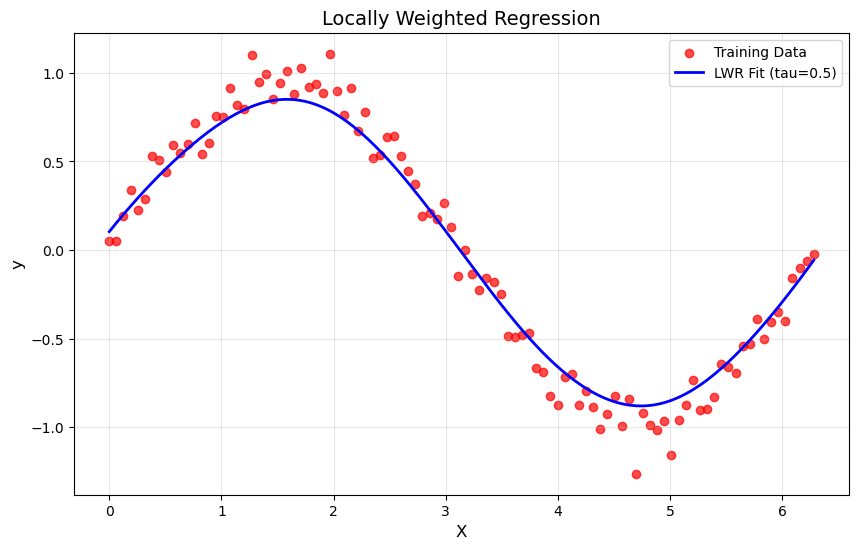

In [20]:
import numpy as np 
import matplotlib.pyplot as plt

def gaussian_kernel(x, xi, tau): 
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(x, X, y, tau): 
    m = X.shape[0] 
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)]) 
    W = np.diag(weights) 
    X_transpose_W = X.T @ W 
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y 
    return x @ theta

np.random.seed(42) 
X = np.linspace(0, 2 * np.pi, 100) 
y = np.sin(X) + 0.1 * np.random.randn(100) 
X_bias = np.c_[np.ones(X.shape), X] 
x_test = np.linspace(0, 2 * np.pi, 200) 
x_test_bias = np.c_[np.ones(x_test.shape), x_test] 
tau = 0.5 
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in 
x_test_bias])

plt.figure(figsize=(10, 6)) 
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7) 
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2) 
plt.xlabel('X', fontsize=12) 
plt.ylabel('y', fontsize=12) 
plt.title('Locally Weighted Regression', fontsize=14) 
plt.legend(fontsize=10) 
plt.grid(alpha=0.3) 
plt.show()

LAB-7 Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use 
Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency 
prediction) for Polynomial Regression.

Demonstrating Linear Regression and Polynomial Regression



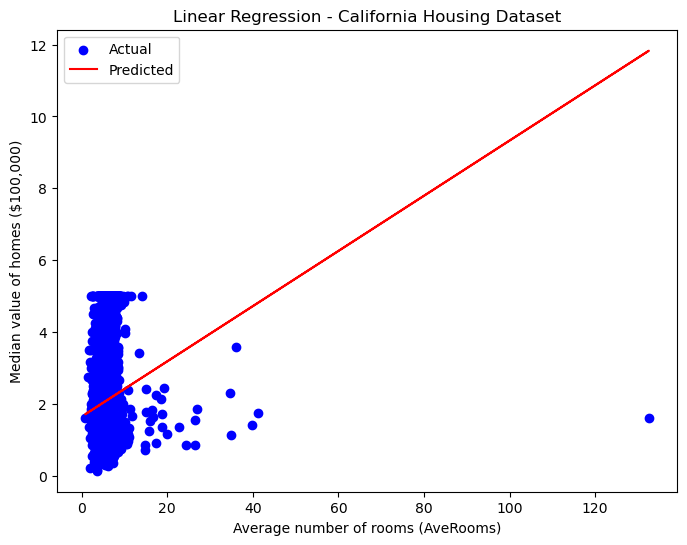

Linear Regression - California Housing Dataset
Mean Squared Error: 1.2923314440807299
R^2 Score: 0.013795337532284901


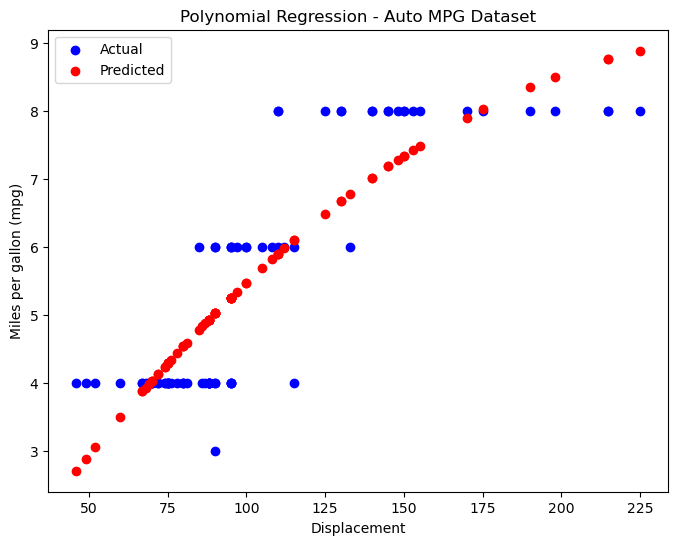

Polynomial Regression - Auto MPG Dataset
Mean Squared Error: 0.7431490557205862
R^2 Score: 0.7505650609469626


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_california():
    housing = fetch_california_housing(as_frame=True)
    X = housing.data[["AveRooms"]]
    y = housing.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Average number of rooms (AveRooms)")
    plt.ylabel("Median value of homes ($100,000)")
    plt.title("Linear Regression - California Housing Dataset")
    plt.legend()
    plt.show()
    print("Linear Regression - California Housing Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))

def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = [
        "mpg", "cylinders", "displacement", "horsepower",
        "weight", "acceleration", "model_year", "origin"
    ]
    data = pd.read_csv(url, sep='\s+', names=column_names, na_values="?")
    data = data.dropna()
    X = data["displacement"].values.reshape(-1, 1)
    y = data["mpg"].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    poly_model = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        LinearRegression()
    )
    poly_model.fit(X_train, y_train)
    y_pred = poly_model.predict(X_test)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.legend()
    plt.show()
    print("Polynomial Regression - Auto MPG Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))

if __name__ == "__main__":
    print("Demonstrating Linear Regression and Polynomial Regression\n")
    linear_regression_california()
    polynomial_regression_auto_mpg()

LAB-8 Develop a program to demonstrate the working of the decision tree algorithm. Use Breast Cancer 
Data set for building the decision tree and apply this knowledge to classify a new sample.

Model Accuracy: 94.74%
Predicted Class for the new sample: Benign


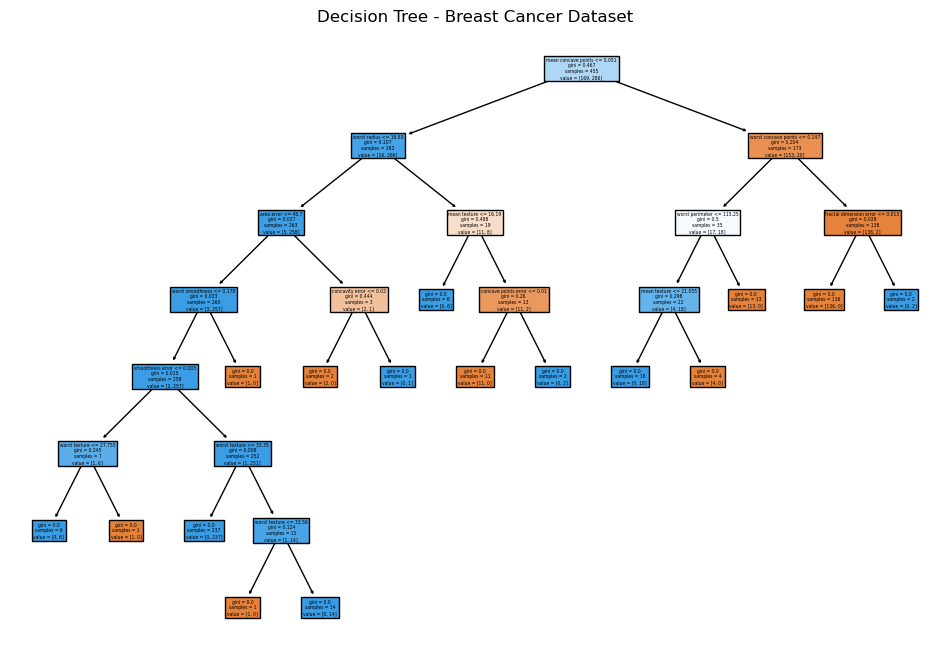

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
new_sample = np.array([X_test[0]])
prediction = clf.predict(new_sample)
prediction_class = "Benign" if prediction[0] == 1 else "Malignant"
print(f"Predicted Class for the new sample: {prediction_class}")

# Plot tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    filled=True,
    feature_names=list(data.feature_names),       
)
plt.title("Decision Tree - Breast Cancer Dataset")
plt.show()

LAB-9 Develop a program to implement the Naive Bayesian classifier considering Olivetti Face Data set for 
training. Compute the accuracy of the classifier, considering a few test data sets. 

Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.80         2
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1

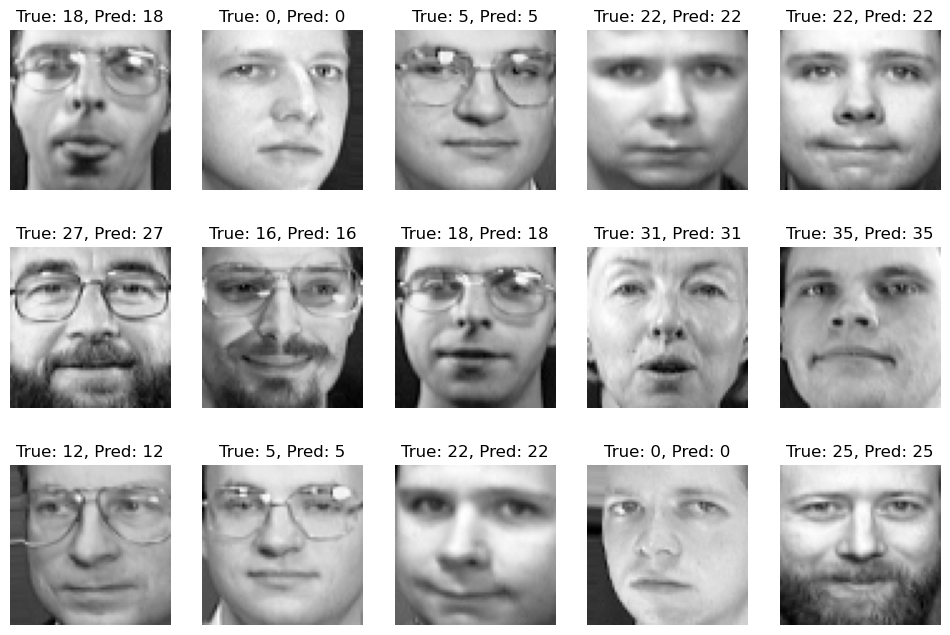

In [32]:
import numpy as np 
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import matplotlib.pyplot as plt

data = fetch_olivetti_faces(shuffle=True, random_state=42) 
X = data.data 
y = data.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42) 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%') 
print("\nClassification Report:") 
print(classification_report(y_test, y_pred, zero_division=1)) 
print("\nConfusion Matrix:") 
print(confusion_matrix(y_test, y_pred)) 
cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy') 
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%') 
fig, axes = plt.subplots(3, 5, figsize=(12, 8)) 
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred): 
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray) 
    ax.set_title(f"True: {label}, Pred: {prediction}") 
    ax.axis('off') 
plt.show()

LAB-10 Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and 
visualize the clustering result.

C:\Users\hassa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hassa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Confusion Matrix:
[[ 36 176]
 [339  18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.17      0.12       212
           1       0.09      0.05      0.07       357

    accuracy                           0.09       569
   macro avg       0.09      0.11      0.09       569
weighted avg       0.09      0.09      0.09       569



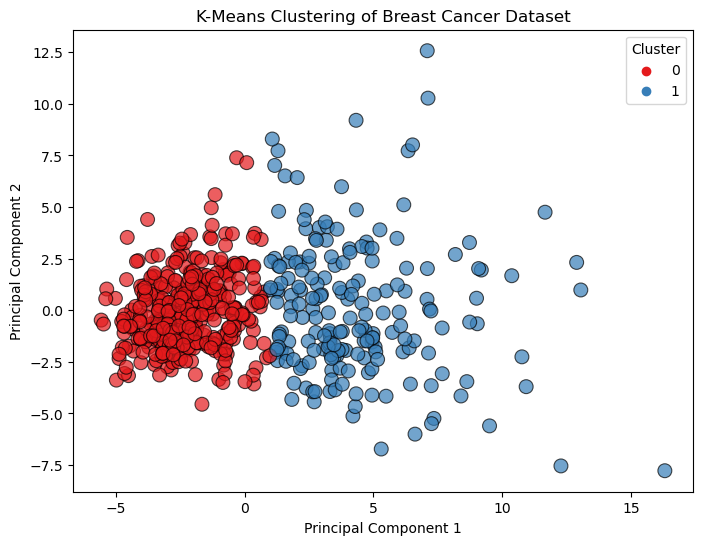

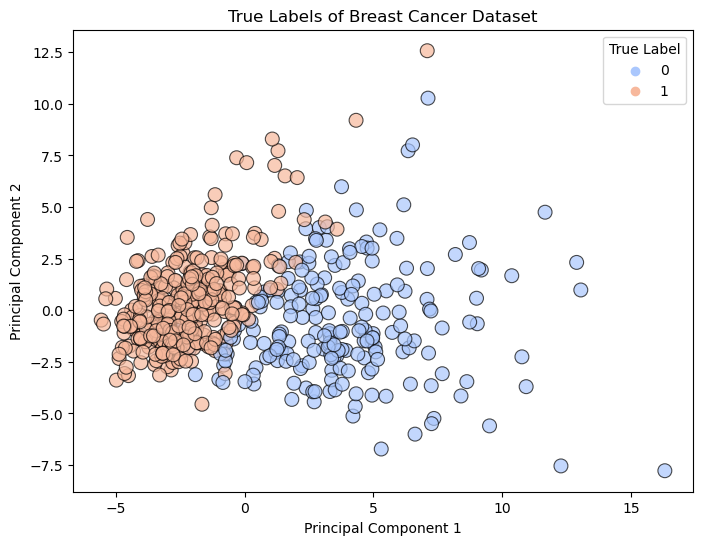

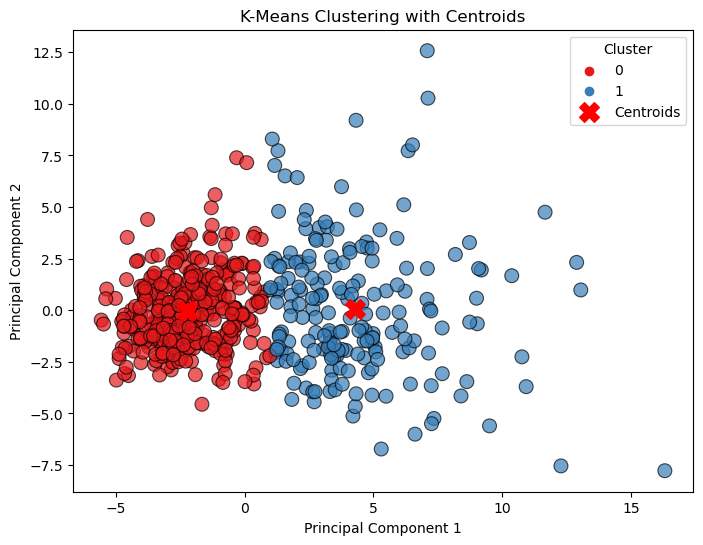

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_breast_cancer 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.metrics import confusion_matrix, classification_report 

data = load_breast_cancer() 
X = data.data 
y = data.target 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
kmeans = KMeans(n_clusters=2, random_state=42) 
y_kmeans = kmeans.fit_predict(X_scaled)

print("Confusion Matrix:") 
print(confusion_matrix(y, y_kmeans)) 
print("\nClassification Report:") 
print(classification_report(y, y_kmeans)) 
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled) 
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2']) 
df['Cluster'] = y_kmeans 
df['True Label'] = y
plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, 
edgecolor='black', alpha=0.7) 
plt.title('K-Means Clustering of Breast Cancer Dataset') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.legend(title="Cluster") 
plt.show()

plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True Label', palette='coolwarm', 
s=100, edgecolor='black', alpha=0.7) 
plt.title('True Labels of Breast Cancer Dataset') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.legend(title="True Label") 
plt.show()

plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, 
edgecolor='black', alpha=0.7) 
centers = pca.transform(kmeans.cluster_centers_) 
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', 
label='Centroids')
plt.title('K-Means Clustering with Centroids') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.legend(title="Cluster") 
plt.show()